In [1]:
!pip install tensorflow
!pip install keras

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("creditcard.csv")

# Drop the 'Time' feature
df = df.drop(columns=['Time'])

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
from sklearn.utils.class_weight import compute_class_weight

# Define class weights to handle imbalance
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

print("Class weights:", class_weights_dict)


Class weights: {0: 0.5008661206149896, 1: 289.14340101522845}


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Define the model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(86, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(44, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(22, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam()
loss = BinaryCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


In [13]:
import numpy as np

# Convert y_train to numpy array if it's a pandas Series
y_train = y_train.to_numpy()

# Recalculate class weights
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

print("Class weights dictionary:", class_weights_dict)

# Convert y_train to integer type if needed
y_train = y_train.astype(int)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=117,
                    batch_size=1563,
                    class_weight=class_weights_dict,
                    verbose=2,
                    validation_split=0.2)


Class weights dictionary: {0: 0.5008661206149896, 1: 289.14340101522845}
Epoch 1/117
117/117 - 5s - 43ms/step - accuracy: 0.9208 - loss: 0.2683 - val_accuracy: 0.9735 - val_loss: 0.1344
Epoch 2/117
117/117 - 1s - 7ms/step - accuracy: 0.9684 - loss: 0.1563 - val_accuracy: 0.9703 - val_loss: 0.1182
Epoch 3/117
117/117 - 1s - 7ms/step - accuracy: 0.9720 - loss: 0.1162 - val_accuracy: 0.9846 - val_loss: 0.0649
Epoch 4/117
117/117 - 1s - 8ms/step - accuracy: 0.9809 - loss: 0.1045 - val_accuracy: 0.9716 - val_loss: 0.0986
Epoch 5/117
117/117 - 1s - 8ms/step - accuracy: 0.9780 - loss: 0.0877 - val_accuracy: 0.9853 - val_loss: 0.0564
Epoch 6/117
117/117 - 1s - 7ms/step - accuracy: 0.9813 - loss: 0.0759 - val_accuracy: 0.9858 - val_loss: 0.0499
Epoch 7/117
117/117 - 1s - 10ms/step - accuracy: 0.9822 - loss: 0.0671 - val_accuracy: 0.9742 - val_loss: 0.0777
Epoch 8/117
117/117 - 1s - 6ms/step - accuracy: 0.9829 - loss: 0.0594 - val_accuracy: 0.9845 - val_loss: 0.0539
Epoch 9/117
117/117 - 1s - 6m

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.45      0.86      0.59        98

    accuracy                           1.00     56962
   macro avg       0.72      0.93      0.79     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.981663733304239
Accuracy Score: 0.9979284435237527


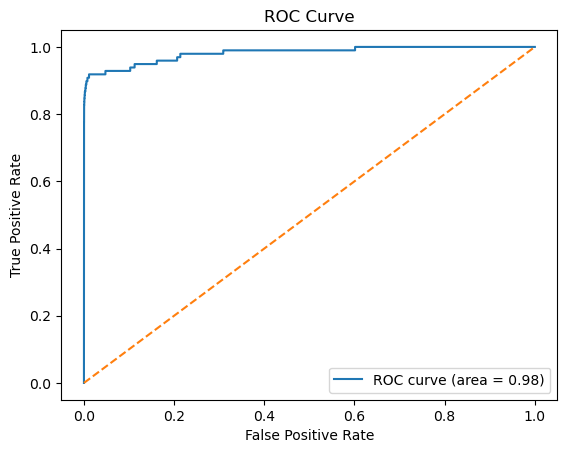

In [14]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Make predictions
y_pred_proba = model.predict(X_test).ravel()
y_pred = (y_pred_proba > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


In [15]:
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 86)                  │           2,580 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 44)                  │           3,828 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 22)                  │             990 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              23 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,265 (86.98 KB)

 Trainable params: 7,421 (28.99 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,844 (57.99 KB)